In [3]:
# Pandas
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

# Numpy
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt

# Lectura de datos
db_route = "data/datos_originales.csv"
df = pd.read_csv(db_route, sep=';')
df.shape

(1068, 20)

In [4]:
print("Número de filas: ", df.shape[0])
print("Número de columnas: ", df.shape[1])
print("Número de columnas y sus tipos de datos: \n")
print(df.dtypes)

Número de filas:  1068
Número de columnas:  20
Número de columnas y sus tipos de datos: 

No.                                  int64
NIT                                  int64
RAZON SOCIAL                        object
SUPERVISOR                          object
REGIÓN                              object
DEPARTAMENTO DOMICILIO              object
CIUDAD DOMICILIO                    object
CIIU                                object
MACROSECTOR                         object
INGRESOS OPERACIONALES\r\n2018*     object
GANANCIA (PERDIDA) 2018             object
TOTAL ACTIVOS 2018                  object
TOTAL PASIVOS 2018                  object
TOTAL PATRIMONIO 2018               object
INGRESOS OPERACIONALES\r\n2017*     object
GANANCIA (PERDIDA) 2017            float64
TOTAL ACTIVOS 2017                  object
TOTAL PASIVOS 2017                  object
TOTAL PATRIMONIO 2017               object
GRUPO EN NIIF                       object
dtype: object


In [5]:
print("Variables numéricas: \n")
df.describe()

Variables numéricas: 



,No.,NIT,GANANCIA (PERDIDA) 2017
count,1068.000000,1.068000e+03,1.067000e+03
mean,534.500000,8.590699e+08,1.147441e+08
std,308.449348,3.782354e+07,5.226753e+09
min,1.000000,8.000003e+08,-7.977997e+10
25%,267.750000,8.300113e+08,2.899945e+06
50%,534.500000,8.600590e+08,5.023917e+07
75%,801.250000,8.910851e+08,1.915863e+08
max,1068.000000,9.010975e+08,6.620412e+10


In [6]:
# Ver datos núlos
print("\nNúmero de filas con valores nulos: ", df.isnull().any(axis=1).sum())
print("Número de columnas con valores nulos: ", df.isnull().any().sum())
print("Lista de columnas con valores núlos y sus tipos: \n", df.isnull().any()[df.isnull().any() == True])

# Porcentaje de completitud
print(f"\nPorcentaje de completitud de las columnas: {(1-(df.isnull().any(axis=1).sum()/df.shape[0]))*100:.2f}%")


Número de filas con valores nulos:  30
Número de columnas con valores nulos:  13
Lista de columnas con valores núlos y sus tipos: 
 REGIÓN                             True
DEPARTAMENTO DOMICILIO             True
CIUDAD DOMICILIO                   True
CIIU                               True
MACROSECTOR                        True
INGRESOS OPERACIONALES\r\n2018*    True
GANANCIA (PERDIDA) 2018            True
TOTAL ACTIVOS 2018                 True
TOTAL PASIVOS 2018                 True
TOTAL PATRIMONIO 2018              True
INGRESOS OPERACIONALES\r\n2017*    True
GANANCIA (PERDIDA) 2017            True
TOTAL ACTIVOS 2017                 True
dtype: bool

Porcentaje de completitud de las columnas: 97.19%


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   No.                            1068 non-null   int64  
 1   NIT                            1068 non-null   int64  
 2   RAZON SOCIAL                   1068 non-null   object 
 3   SUPERVISOR                     1068 non-null   object 
 4   REGIÓN                         1067 non-null   object 
 5   DEPARTAMENTO DOMICILIO         1063 non-null   object 
 6   CIUDAD DOMICILIO               1064 non-null   object 
 7   CIIU                           1067 non-null   object 
 8   MACROSECTOR                    1065 non-null   object 
 9   INGRESOS OPERACIONALES
2018*  1067 non-null   object 
 10  GANANCIA (PERDIDA) 2018        1067 non-null   object 
 11  TOTAL ACTIVOS 2018             1066 non-null   object 
 12  TOTAL PASIVOS 2018             1066 non-null   ob

In [8]:
# Ver duplicidad de datos
print("\nNúmero de filas duplicadas: ", df.duplicated().sum())
print("Número de filas con indice duplicado: ", df['NIT'].duplicated().sum())


Número de filas duplicadas:  0
Número de filas con indice duplicado:  68


In [9]:
df.sample(5)

,No.,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
318,319,800052534,DISTRIBUCIONES AXA SAS,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,G4645 - Comercio al por mayor de productos far...,COMERCIO,2431623100,60163750,787302360,564013370,223288990,2199907330,43110390.0,721060330,$ 530920370,190139960,NIIF PYMES-GRUPO 2
1063,1064,900292211,REFINADORA NACIONAL DE ACEITES Y GRASAS SAS,SUPERSOCIEDADES,Costa Pacífica,VALLE,CANDELARIA-VALLE,C1030 - Elaboración de aceites y grasas de ori...,MANUFACTURA,1386316790,22151990,501416690,274589220,226827470,1189202740,6154480.0,646611960,$ 396936480,249675480,NIIF PLENAS-GRUPO 1
1065,1066,860058831,avicola los cambulos sa.,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,A0145 - Cría de aves de corral,AGROPECUARIO,2485960390,18906280,780480300,505029030,275451270,2209342160,15342020.0,755261660,$ 487229570,268032090,NIIF PYMES-GRUPO 2
614,615,830131993,EFECTIVO LTDA,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,H5229 - Otras actividades complementarias al t...,SERVICIOS,5200510120,483527130,3293350180,1985023190,1308326990,5166809290,374284980.0,3292129500,$ 2290473160,1001656340,NIIF PYMES-GRUPO 2
652,653,900818642,CONSTRUCCIONES COLOMBIANAS OHL SAS,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,F4210 - Construcción de carreteras y vías de f...,CONSTRUCCIÓN,1448136230,-893997020,1996355320,1986833700,9521620,1980487340,141749450.0,1455661690,$ 1242144700,213516990,NIIF PLENAS-GRUPO 1


## Razon Social, NIT y No.

In [10]:
# Como se encontraron duplicados en la variable NIT, se procede a eliminarlos
df.drop_duplicates(subset='NIT', inplace=True)
print("Número de filas: ", df.shape[0])

# Se elimina la columna 'Razon social' y 'No.' ya que no aportan información relevante
df = df.drop(['RAZON SOCIAL', 'No.', 'NIT'], axis=1)

Número de filas:  1000


## Supervisor

In [11]:
# Dar valores únicos de columna supervisor
df['SUPERVISOR'].value_counts(dropna=False)

SUPERSOCIEDADES    892
SUPERSALUD          42
SUPERFINANCIERA     38
SUPERSERVICIOS      16
SUPERVIGILANCIA      8
SUPERSUCIEDADES      4
Name: SUPERVISOR, dtype: int64

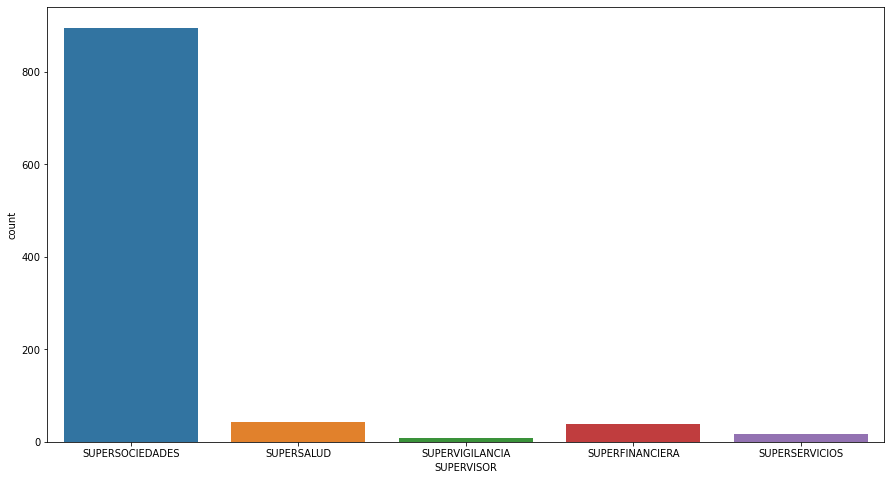

In [12]:
# En la coluna 'SUPERVISOR' se reemplazan los valores 'SUPERSUCIEDADES' por 'SUPERSOCIEDADES'
df['SUPERVISOR'] = df['SUPERVISOR'].replace('SUPERSUCIEDADES', 'SUPERSOCIEDADES')
# Graficar valores de la columna 'SUPERVISOR'
plt.figure(figsize=(15,8))
sns.countplot(x='SUPERVISOR', data=df)

In [13]:
# One hot encoder para la columna supervisor
from random import sample
df = pd.get_dummies(df, columns=['SUPERVISOR'], prefix=['SUPERVISOR'])

## Región

In [14]:
# Dar valores únicos de columna región
df['REGIÓN'].value_counts(dropna=False)

Bogotá - Cundinamarca    555
Antioquia                161
Costa Pacífica           126
Costa Atlántica           94
Centro - Oriente          30
Eje Cafetero              22
Otros                      7
Costa Atlantica            4
NaN                        1
Name: REGIÓN, dtype: int64

In [15]:
# Se cambian valores núlos de la columna 'REGIÓN' por la moda
df['REGIÓN'] = df['REGIÓN'].fillna(df['REGIÓN'].mode()[0])

# En la columna 'REGIÓN' se reemplazan los valores 'Costa Atlántica' por 'Costa Atlantica'
df['REGIÓN'] = df['REGIÓN'].replace('Costa Atlántica', 'Costa Atlantica')

# En la columna región, dados los pocos valores para 'Eje Cafetero' y 'Centro - Oriente', se agrupan en una nueva categoría 'Otros'
df['REGIÓN'] = df['REGIÓN'].replace(['Eje Cafetero', 'Centro - Oriente'], 'Otros')

# Dar valores únicos de columna región
df['REGIÓN'].value_counts(dropna=False)

Bogotá - Cundinamarca    556
Antioquia                161
Costa Pacífica           126
Costa Atlantica           98
Otros                     59
Name: REGIÓN, dtype: int64

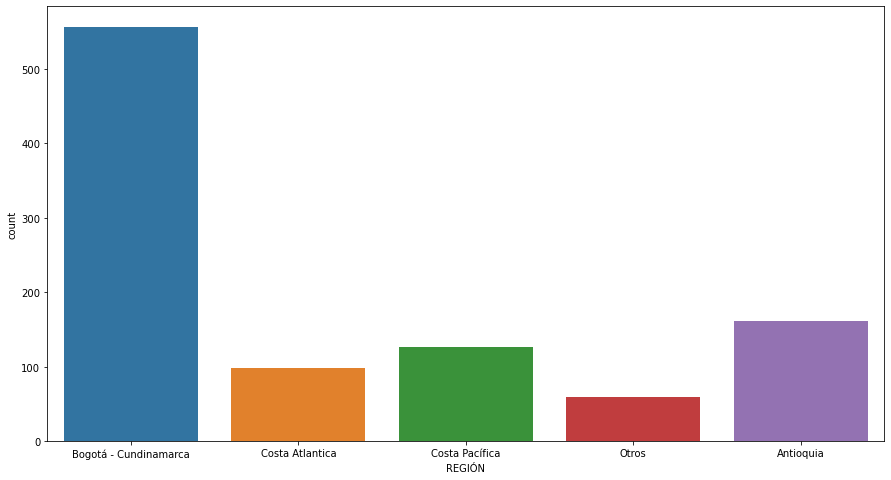

In [16]:
# Graficar valores de la columna 'REGIÓN'
plt.figure(figsize=(15,8))
sns.countplot(x='REGIÓN', data=df)

In [17]:
# One hot encoder para la columna región
df = pd.get_dummies(df, columns=['REGIÓN'], prefix=['REGION'])
df.sample(5)

,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros
984,ATLANTICO,BARRANQUILLA-ATLANTICO,H4930 - Transporte por tuberías,SERVICIOS,11975174030,7254085770,63558409630,31429655390,32128754240,10121527250,6.488579e+09,59315353430,$ 29690891160,29624462270,NIIF PLENAS-GRUPO 1,0,0,1,0,0,0,0,1,0,0
260,SANTANDER,BUCARAMANGA-SANTANDER,N7820 - Actividades de agencias de empleo temp...,SERVICIOS,1652314330,14094320,308170510,183853070,124317440,1600648680,1.600304e+07,283427790,$ 165636120,117791670,NIIF PYMES-GRUPO 2,0,0,0,1,0,0,0,0,0,1
99,ANTIOQUIA,MEDELLIN-ANTIOQUIA,G4511 - Comercio de vehículos automotores nuevos,COMERCIO,1581724850,17603060,367394080,314842270,52551810,1356034030,4.054880e+06,418582150,$ 383633400,34948750,NIIF PYMES-GRUPO 2,0,0,0,1,0,1,0,0,0,0
456,ANTIOQUIA,ENVIGADO-ANTIOQUIA,G4711 - Comercio al por menor en establecimien...,COMERCIO,2268837740,194230,783256220,668218910,115037310,1733342180,-1.486690e+06,548145670,$ 433302600,114843070,NIIF PYMES-GRUPO 2,0,0,0,1,0,1,0,0,0,0
113,CAUCA,PUERTO-TEJADA-CAUCA,C1709 - Fabricación de otros artículos de pape...,MANUFACTURA,3476583450,181802660,3751856300,1014275330,2737580970,2933234810,1.523174e+08,4100643480,$ 1346864930,2753778550,NIIF PLENAS-GRUPO 1,0,0,0,1,0,0,0,0,1,0


## Departamento y Ciudad Domicilio

In [18]:
# Dar valores únicos de columna región
df['DEPARTAMENTO DOMICILIO'].value_counts(dropna=False)

BOGOTA D.C.                 478
ANTIOQUIA                   160
VALLE                       105
CUNDINAMARCA                 70
ATLANTICO                    58
SANTANDER                    25
BOLIVAR                      23
CAUCA                        15
RISARALDA                    11
CALDAS                       10
MAGDALENA                     7
BOGOTÁ D.C.                   6
NaN                           5
CORDOBA                       4
NORTE DE SANTANDER            4
NARIÑO                        4
HUILA                         2
GUAJIRA                       2
TOLIMA                        2
META                          2
BOYACA                        1
CHOCO                         1
CESAR                         1
SAN ANDRES Y PROVIDENCIA      1
SUCRE                         1
QUINDIO                       1
CASANARE                      1
Name: DEPARTAMENTO DOMICILIO, dtype: int64

In [19]:
# Dado el pequeño número de datos por cada categoría de departamento y la correlación con la columna 'CIUDAD DOMICILIO' y 'REGIÓN', se elimina la columna 'DEPARTAMENTO DOMICILIO' y 'CIUDAD DOMICILIO'
df = df.drop(['DEPARTAMENTO DOMICILIO', 'CIUDAD DOMICILIO'], axis=1)

## CIIU

In [20]:
# Dar valores únicos de columna CIUU
df['CIIU'].value_counts(dropna=False)

G4511 - Comercio de vehículos automotores nuevos                                                                                                              42
G4645 - Comercio al por mayor de productos farmacéuticos, medicinales, cosméticos y de tocador                                                                33
O8430- Actividades de planes de seguridad social de afiliacion obligatoria                                                                                    25
F4111 - Construcción de edificios residenciales                                                                                                               24
G4661 - Comercio al por mayor de combustibles sólidos, líquidos, gaseosos y productos conexos                                                                 23
                                                                                                                                                              ..
M6920 - Actividades de contabilida

In [21]:
# Dada la redundancia con la columna 'MACROSECTOR' y la cantidad de datos distintos, se elimina la columna 'CIIU'
df = df.drop(['CIIU'], axis=1)

## Macrosector

In [22]:
# Dar valores únicos de columna Macrosector
df['MACROSECTOR'].value_counts(dropna=False)

MANUFACTURA             328
COMERCIO                301
SERVICIOS               225
CONSTRUCCIÓN             63
MINERO-HIDROCARBUROS     54
AGROPECUARIO             23
CONSTRUCCION              3
NaN                       3
Name: MACROSECTOR, dtype: int64

In [23]:
# Se cambian valores núlos de la columna 'MACROSECTOR' por la moda
df['MACROSECTOR'] = df['MACROSECTOR'].fillna(df['MACROSECTOR'].mode()[0])

# En la columna MACROSECTOR, se remplazan los valores 'CONSTRUCCIÓN' por 'CONSTRUCCION'
df['MACROSECTOR'] = df['MACROSECTOR'].replace('CONSTRUCCIÓN', 'CONSTRUCCION')

df['MACROSECTOR'].value_counts()

MANUFACTURA             331
COMERCIO                301
SERVICIOS               225
CONSTRUCCION             66
MINERO-HIDROCARBUROS     54
AGROPECUARIO             23
Name: MACROSECTOR, dtype: int64

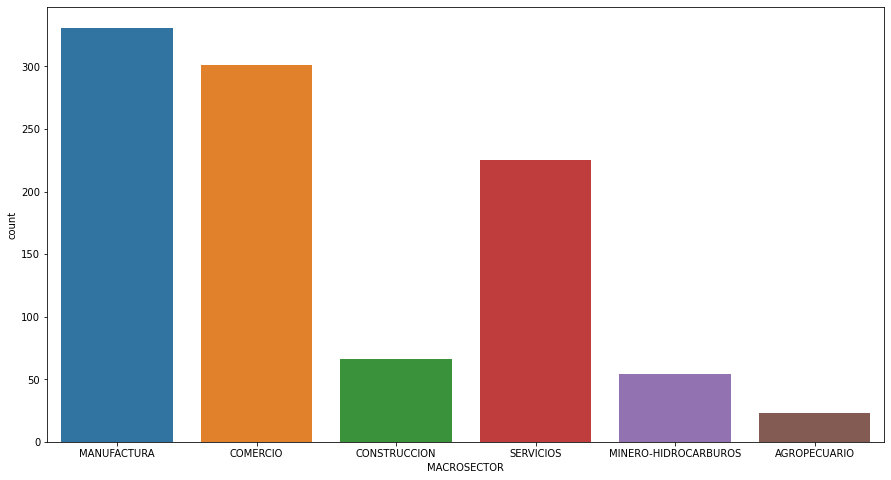

In [24]:
# Graficar valores de la columna 'MACROSECTOR'
plt.figure(figsize=(15,8))
sns.countplot(x='MACROSECTOR', data=df)

In [25]:
# One hot encoder para la columna MACROSECTOR
df = pd.get_dummies(df, columns=['MACROSECTOR'], prefix=['MACROSECTOR'])
df.sample(2)

,INGRESOS OPERACIONALES\r\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\r\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,...,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS
219,3720462540,59078120,1841074840,432262270,1408812570,3591680010,-57876990.0,1706871000,$ 357136550,1349734450,NIIF PLENAS-GRUPO 1,0,...,0,0,0,1,0,0,0,0,0,1,0,0
153,3012803520,22869980,1934777480,1542020370,392757110,3035006120,12018160.0,1810006610,$ 1440119470,369887140,NIIF PYMES-GRUPO 2,0,...,0,1,0,0,0,0,0,1,0,0,0,0


## Total activos, total pasivos, y total patrimonio

In [26]:
# Dado que los activos son iguales a la suma de los pasivos y el patrimonio, se procede a eliminar las columnas de estos dos últimos
df = df.drop(['TOTAL PASIVOS 2018', 'TOTAL PATRIMONIO 2018', 'TOTAL PASIVOS 2017', 'TOTAL PATRIMONIO 2017'], axis=1)

In [27]:
# Cambiar columna 'TOTAL ACTIVOS 2017' a tipo numérico
df['TOTAL ACTIVOS 2017'] = pd.to_numeric(df['TOTAL ACTIVOS 2017'], errors='coerce')
# Cambiar nulos por la media
df['TOTAL ACTIVOS 2017'] = df['TOTAL ACTIVOS 2017'].fillna(df['TOTAL ACTIVOS 2017'].mean())

In [28]:
# Cambiar columna 'TOTAL ACTIVOS 2018' a tipo numérico
df['TOTAL ACTIVOS 2018'] = pd.to_numeric(df['TOTAL ACTIVOS 2018'], errors='coerce')
# Cambiar nulos por la media
df['TOTAL ACTIVOS 2018'] = df['TOTAL ACTIVOS 2018'].fillna(df['TOTAL ACTIVOS 2018'].mean())


In [29]:
# Crear columna con el porcentaje de variación de los activos
df['VARIACION ACTIVOS'] = (df['TOTAL ACTIVOS 2018'] - df['TOTAL ACTIVOS 2017']) / df['TOTAL ACTIVOS 2017']
# Eliminar columnas de activos
df = df.drop(['TOTAL ACTIVOS 2017', 'TOTAL ACTIVOS 2018'], axis=1)
# Estadisticas descriptivas de la columna 'VARIACION ACTIVOS'
df['VARIACION ACTIVOS'].describe()

count    1000.000000
mean        0.278988
std         1.377705
min        -0.923522
25%         0.007419
50%         0.088950
75%         0.207616
max        21.880655
Name: VARIACION ACTIVOS, dtype: float64

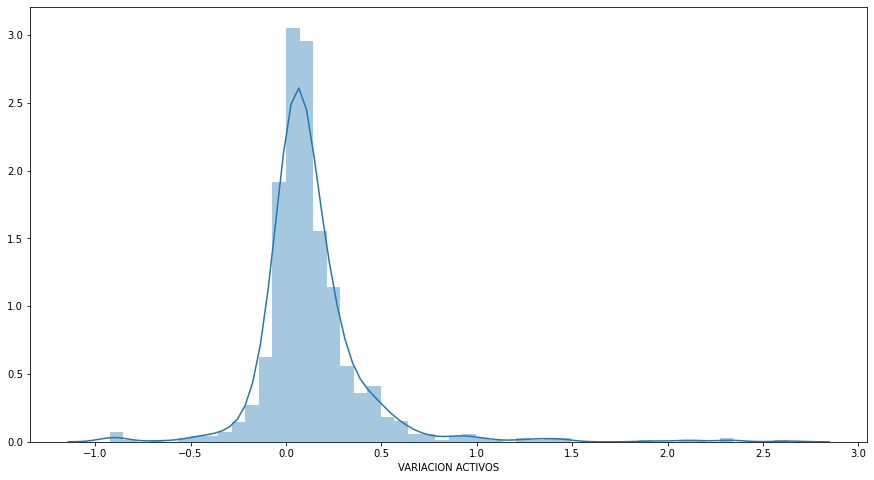

In [30]:
# Eliminar datos atípicos de la columna 'VARIACION ACTIVOS'
df = df[df['VARIACION ACTIVOS'] < 3]
# Se grafica la distribución (curva) de la columna 'VARIACION ACTIVOS'
plt.figure(figsize=(15,8))
sns.distplot(df['VARIACION ACTIVOS'])

## Ingresos operacionales y Ganancia (Perdida)

In [31]:
# Dada la redundancia en la información entre Ingresos Operacionales, Ganancia (Perdida), y Activos, se deciden eliminar dos. Se considera que los activos miden mejor el crecimiento económico de la empresa, por lo que se eliminan los ingresos operacionales y la ganancia (perdida)
df = df.drop(['INGRESOS OPERACIONALES\r\n2018*', 'GANANCIA (PERDIDA) 2018', 'INGRESOS OPERACIONALES\r\n2017*', 'GANANCIA (PERDIDA) 2017'], axis=1)

## Grupo en NIIF

NIIF PLENAS-GRUPO 1            751
NIIF PYMES-GRUPO 2             227
REGIMEN R 414 de 2014 - CGN      8
Name: GRUPO EN NIIF, dtype: int64


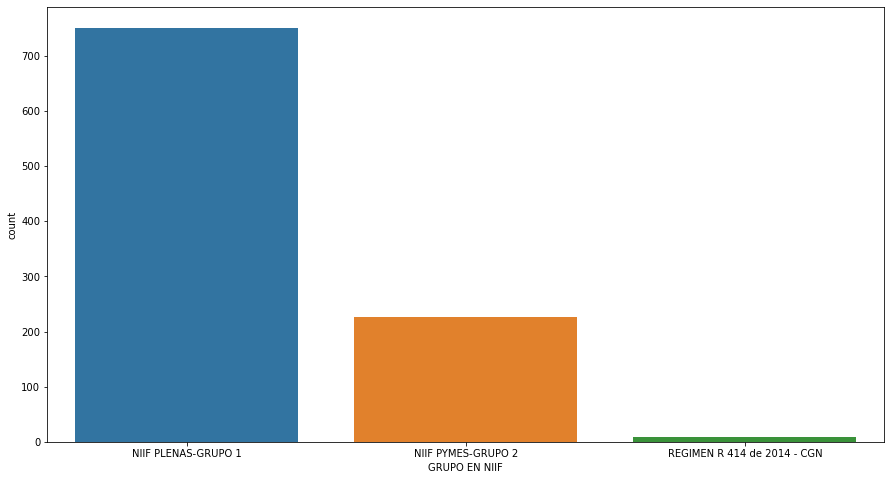

In [32]:
# Contar valores únicos de la columna 'GRUPO EN NIIF'
print(df['GRUPO EN NIIF'].value_counts(dropna=False))

# Graficar valores de la columna 'GRUPO EN NIIF'
plt.figure(figsize=(15,8))
sns.countplot(x='GRUPO EN NIIF', data=df)

In [33]:
# Dadas las restricciones de las funciones a utilizar para implementar los modelos de clasificación, se procede a convertir los valores de la columna 'GRUPO EN NIIF' a númericos
# Se crea un diccionario con los valores de la columna 'GRUPO EN NIIF' y sus respectivos valores numéricos
# Se organizan de menor a mayor según el tamaño de las empresas
grupo_nif_numerico = {'REGIMEN R 414 de 2014 - CGN':1, 'NIIF PYMES-GRUPO 2': 2, 'NIIF PLENAS-GRUPO 1': 3}
df['GRUPO EN NIIF'] = df['GRUPO EN NIIF'].replace(grupo_nif_numerico)

## Resúmen de datos procesados

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 1067
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GRUPO EN NIIF                     986 non-null    int64  
 1   SUPERVISOR_SUPERFINANCIERA        986 non-null    uint8  
 2   SUPERVISOR_SUPERSALUD             986 non-null    uint8  
 3   SUPERVISOR_SUPERSERVICIOS         986 non-null    uint8  
 4   SUPERVISOR_SUPERSOCIEDADES        986 non-null    uint8  
 5   SUPERVISOR_SUPERVIGILANCIA        986 non-null    uint8  
 6   REGION_Antioquia                  986 non-null    uint8  
 7   REGION_Bogotá - Cundinamarca      986 non-null    uint8  
 8   REGION_Costa Atlantica            986 non-null    uint8  
 9   REGION_Costa Pacífica             986 non-null    uint8  
 10  REGION_Otros                      986 non-null    uint8  
 11  MACROSECTOR_AGROPECUARIO          986 non-null    uint8  
 12  MACROSE

In [35]:
df.describe()

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,2.753550,0.038540,0.038540,0.016227,0.902637,0.004057,0.162272,0.553753,0.097363,0.127789,0.058824,0.023327,0.304260,0.066937,0.333671,0.053753,0.218053,0.131846
std,0.449605,0.192593,0.192593,0.126412,0.296602,0.063596,0.368887,0.497355,0.296602,0.334024,0.235414,0.151015,0.460327,0.250040,0.471763,0.225643,0.413133,0.287880
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.923522
25%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006116
50%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087002
75%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.198814
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.629388


## Reportes automáticos

In [ ]:
import pandas_profiling

profiling = pandas_profiling.ProfileReport(df, title="Profiling Report ConsultAndes")
profiling.to_notebook_iframe()

In [ ]:
profiling.to_file("consultAndes_profile.html")

## Almacenar datos procesados en un archivo CSV

In [ ]:
from pathlib import Path

try:
    filepath = Path('data/processed_data.csv')
    df.to_csv(filepath, index=False)
    print("Archivo guardado exitosamente")
except:
    print("Error al guardar el archivo")